# decision tree

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_tree = pd.read_csv('PUBG_player.csv')
data_tree.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_RoundsPlayed,solo_Wins,solo_Rating,solo_DamagePg,solo_HealsPg,solo_KillsPg,...,squad_HealsPg,squad_KillsPg,squad_MoveDistancePg,squad_RevivesPg,squad_RoundMostKills,squad_AvgSurvivalTime,squad_WinPoints,squad_AvgWalkDistance,squad_AvgRideDistance,squad_TimeSurvivedPg
0,BreakNeck,4405,3.14,17.65,17,3,1559.78,255.36,1.94,2.59,...,3.40,2.86,8091.57,0.36,11,1449.03,4868,2626.97,4372.64,1657.95
1,Blackwalk,8199,4.41,18.18,33,6,1884.53,393.04,1.82,3.61,...,2.83,3.05,8381.97,0.38,14,1570.51,4058,2422.48,6009.73,1630.18
2,mercedes_benz,4454,3.60,0.00,5,0,1255.92,329.76,1.00,3.60,...,2.41,3.20,7625.66,0.29,17,1223.28,5929,1871.89,3011.87,1591.65
3,DORA,7729,14.00,50.00,8,4,1798.70,751.95,1.00,7.00,...,2.47,2.76,7733.03,0.29,12,1583.73,2576,2154.62,5578.41,1583.73
4,n2tstar,0,10.50,33.33,6,2,1668.67,637.48,2.00,7.00,...,2.99,3.05,7741.01,0.29,15,1608.96,2579,2098.47,5642.54,1608.96


In [4]:
data_tree = data_tree[['tracker_id','solo_WinRatio','solo_Wins','solo_KillDeathRatio','solo_Rating','solo_KillsPg','solo_DamagePg','solo_HealsPg']]

In [5]:
for i in range (len(data_tree['solo_WinRatio'])):
    if data_tree['solo_WinRatio'][i]>15:
        data_tree['solo_WinRatio'][i]=1
    else:
        data_tree['solo_WinRatio'][i]=0
        
data_tree.head()

,tracker_id,solo_WinRatio,solo_Wins,solo_KillDeathRatio,solo_Rating,solo_KillsPg,solo_DamagePg,solo_HealsPg
0,4405,1.0,3,3.14,1559.78,2.59,255.36,1.94
1,8199,1.0,6,4.41,1884.53,3.61,393.04,1.82
2,4454,0.0,0,3.60,1255.92,3.60,329.76,1.00
3,7729,1.0,4,14.00,1798.70,7.00,751.95,1.00
4,0,1.0,2,10.50,1668.67,7.00,637.48,2.00


In [23]:
data_tree.to_csv('solo_winratio.csv')

In [6]:

field_names_df = pd.read_table('predictor.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['tracker_id',
 'solo_WinRatio',
 'solo_Wins',
 'solo_KillDeathRatio',
 'solo_Rating',
 'solo_KillsPg',
 'solo_DamagePg',
 'solo_HealsPg']

In [7]:
data_tree.groupby('solo_WinRatio').count()

,tracker_id,solo_Wins,solo_KillDeathRatio,solo_Rating,solo_KillsPg,solo_DamagePg,solo_HealsPg
solo_WinRatio,,,,,,,
0.0,81441,81441,81441,81441,81441,81441,81441
1.0,6457,6457,6457,6457,6457,6457,6457


In [8]:
data_tree.describe()

,tracker_id,solo_WinRatio,solo_Wins,solo_KillDeathRatio,solo_Rating,solo_KillsPg,solo_DamagePg,solo_HealsPg
count,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000
mean,110794.357050,0.073460,2.080093,1.865855,1768.627033,1.682336,194.256103,1.415902
std,63648.581759,0.260892,3.394513,1.776301,348.721933,1.119798,112.640548,0.894112
min,0.000000,0.000000,0.000000,0.000000,984.580000,0.000000,0.000000,0.000000
25%,51925.250000,0.000000,0.000000,1.030000,1477.232500,1.010000,126.550000,0.930000
50%,112705.500000,0.000000,1.000000,1.470000,1754.210000,1.430000,169.910000,1.290000
75%,164879.750000,0.000000,3.000000,2.140000,2041.137500,2.000000,231.520000,1.730000
max,222490.000000,1.000000,106.000000,100.000000,2967.090000,20.000000,2029.420000,24.000000


In [9]:
data_tree.groupby('solo_WinRatio').median()

,tracker_id,solo_Wins,solo_KillDeathRatio,solo_Rating,solo_KillsPg,solo_DamagePg,solo_HealsPg
solo_WinRatio,,,,,,,
0.0,113945,1,1.40,1775.06,1.36,163.77,1.27
1.0,95240,2,4.25,1526.47,3.24,348.69,1.60


In [10]:

def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
# breast_cancer_scaled = scaled_df(breast_cancer)
data_tree_scaled = scaled_df(data_tree)

In [11]:
data_tree_scaled.head()

,tracker_id,solo_WinRatio,solo_Wins,solo_KillDeathRatio,solo_Rating,solo_KillsPg,solo_DamagePg,solo_HealsPg
0,4405,1.0,3,0.0314,0.290137,0.1295,0.125829,0.080833
1,8199,1.0,6,0.0441,0.453945,0.1805,0.193671,0.075833
2,4454,0.0,0,0.0360,0.136867,0.1800,0.162490,0.041667
3,7729,1.0,4,0.1400,0.410651,0.3500,0.370525,0.041667
4,0,1.0,2,0.1050,0.345063,0.3500,0.314119,0.083333


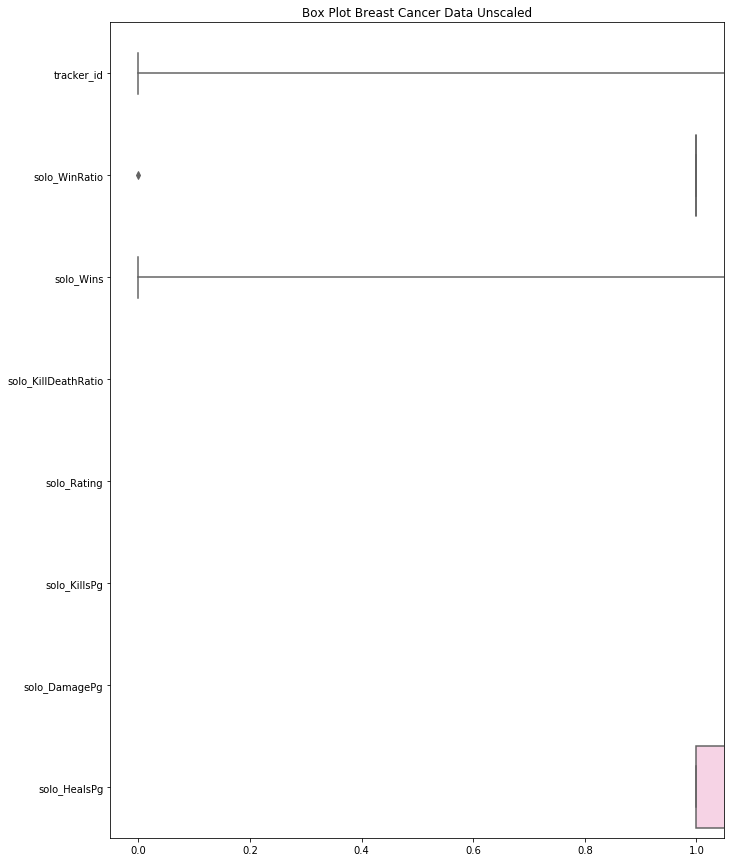

In [12]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = data_tree[1:6], 
  orient = 'h', 
  palette = 'Set3')

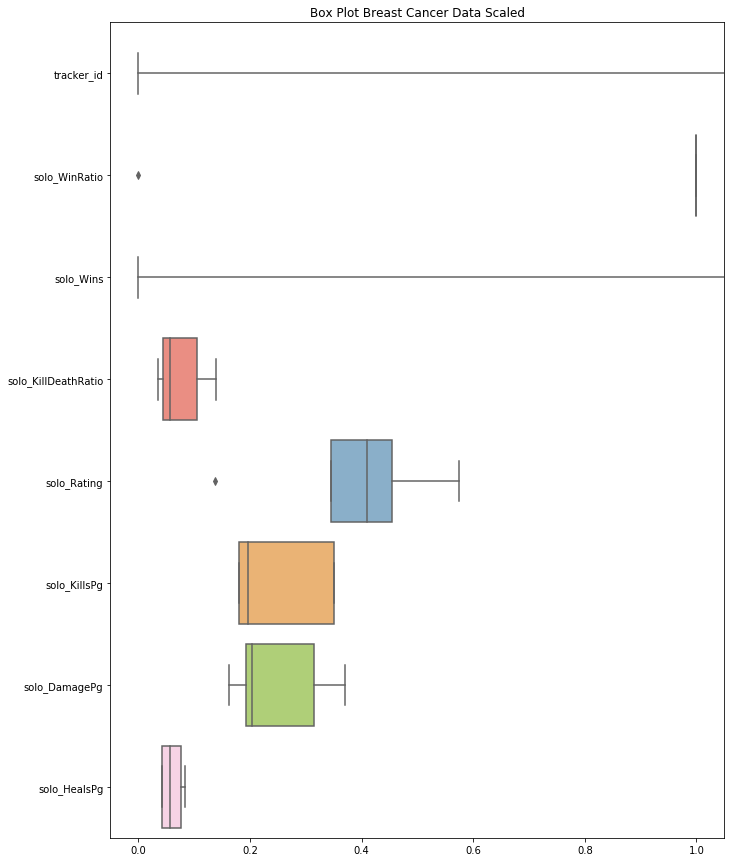

In [13]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = data_tree_scaled[1:6], 
  orient = 'h', 
  palette = 'Set3')

In [14]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['solo_Wins',
 'solo_KillDeathRatio',
 'solo_Rating',
 'solo_KillsPg',
 'solo_DamagePg',
 'solo_HealsPg']

In [15]:
def rank_predictors(dat,l,f='solo_WinRatio'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p][1]-median_vals[p][0])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(data_tree,predictor_names)
cat_rank

{'solo_DamagePg': 0.091119630239181626,
 'solo_HealsPg': 0.013750000000000004,
 'solo_KillDeathRatio': 0.028500000000000001,
 'solo_KillsPg': 0.094,
 'solo_Rating': 0.083782426552615488,
 'solo_Wins': 0.009433962264150943}

In [16]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('solo_Wins', 0.009433962264150943),
 ('solo_HealsPg', 0.013750000000000004),
 ('solo_KillDeathRatio', 0.028500000000000001),
 ('solo_Rating', 0.083782426552615488),
 ('solo_DamagePg', 0.091119630239181626),
 ('solo_KillsPg', 0.094)]

In [17]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[3:]:
    ranked_predictors.append(f[0])
ranked_predictors

['solo_Rating', 'solo_DamagePg', 'solo_KillsPg']

In [18]:
X = data_tree_scaled[predictor_names]
y = data_tree_scaled['solo_WinRatio']

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [21]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
# Decision Tree cross validation

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,X,y,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.995665464273
Accuracy score using Decision Tree is 0.995250284414


In [22]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.99700790663
Accuracy score using Random Forest is 0.996416382253
